# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000) #TODO change this back at some point bc the size is so small. 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1429

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
#wrap this in a try and accept to grab stuff

url = "http://api.openweathermap.org/data/2.5/weather?"

temp = []
humidity = []
clouds = []
wind_speed = []
new_lats = []
new_longs = []
cities_4_del = []


for city in cities: 
    try: 
        city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
        json_responce = requests.get(city_url).json()
        temp.append(1.8 * (float(json_responce["main"]["temp"])-273) + 32)
        humidity.append(json_responce["main"]["humidity"])
        clouds.append(json_responce["clouds"]["all"])
        wind_speed.append(json_responce["wind"]["speed"])
        new_lats.append(json_responce['coord']['lat'])
        new_longs.append(json_responce['coord']['lon'])
    
        print(f'adding {city}')

        #in here we are grabbing weather data for each city. 
    except KeyError:
        print("city not found... skipping.....")
        cities_4_del.append(city)
   

 vila velha
adding longview
adding cockburn town
adding ko samui
adding kirakira
adding kruisfontein
adding voznesenye
adding kaeo
adding plettenberg bay
adding el carrizo
adding monzon
adding abha
adding stavern
adding zvornik
city not found... skipping.....
adding shelopugino
adding christchurch
city not found... skipping.....
adding nouadhibou
adding nagua
city not found... skipping.....
adding ocho rios
adding powell river
adding tuatapere
city not found... skipping.....
adding kaitangata
adding poum
adding road town
adding pocao de pedras
adding sao filipe
adding taoudenni
adding parauna
adding tomatlan
adding saldanha
adding ikom
adding limbang
adding college
adding nikolskiy
adding santa vitoria do palmar
adding saint-augustin
adding malinovoye ozero
adding rongcheng
adding vanavara
adding mecca
adding elizabeth city
adding caravelas
adding chipata
adding price
adding geraldton
adding puerto baquerizo moreno
adding hedaru
adding bilibino
adding cherskiy
adding isangel
adding xud

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
for city in cities_4_del:
    cities.remove(city)

In [5]:


data = {
    "City" : cities,
    "Latitude" : new_lats,
    "Longitude" :new_longs,
    "Temperature" : temp,
    "Humidity" : humidity,
    "Cloudiness %" : clouds,
    "Wind Speed (mph)" : wind_speed
}
print(len(cities))
print(len(new_lats))
#makes blanks in dataframe so I don't have to think with my brain and can instaed think with computer brain

weather_df = pd.DataFrame(data)
weather_df


1311
1311


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)
0,severo-kurilsk,50.6789,156.1250,39.830,79,19,2.87
1,wloszczowa,50.8526,19.9659,52.934,79,100,0.89
2,mataura,-46.1927,168.8643,55.274,70,62,6.71
3,airai,-8.9266,125.4092,73.472,60,18,1.56
4,salalah,17.0151,54.0924,82.670,83,75,1.54
...,...,...,...,...,...,...,...
1306,yangjiang,21.8500,111.9667,80.276,56,92,0.50
1307,kinablangan,7.6947,126.5503,83.876,68,100,1.97
1308,kropotkin,45.4375,40.5756,52.610,95,76,3.43
1309,thunder bay,48.4001,-89.3168,45.932,61,75,5.66


In [6]:

weather_df.to_csv("weather_data.csv") #make a lil csv
weather_df


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)
0,severo-kurilsk,50.6789,156.1250,39.830,79,19,2.87
1,wloszczowa,50.8526,19.9659,52.934,79,100,0.89
2,mataura,-46.1927,168.8643,55.274,70,62,6.71
3,airai,-8.9266,125.4092,73.472,60,18,1.56
4,salalah,17.0151,54.0924,82.670,83,75,1.54
...,...,...,...,...,...,...,...
1306,yangjiang,21.8500,111.9667,80.276,56,92,0.50
1307,kinablangan,7.6947,126.5503,83.876,68,100,1.97
1308,kropotkin,45.4375,40.5756,52.610,95,76,3.43
1309,thunder bay,48.4001,-89.3168,45.932,61,75,5.66


In [7]:
weather_df = pd.read_csv('weather_data.csv')
weather_df

,Unnamed: 0,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)
0,0,severo-kurilsk,50.6789,156.1250,39.830,79,19,2.87
1,1,wloszczowa,50.8526,19.9659,52.934,79,100,0.89
2,2,mataura,-46.1927,168.8643,55.274,70,62,6.71
3,3,airai,-8.9266,125.4092,73.472,60,18,1.56
4,4,salalah,17.0151,54.0924,82.670,83,75,1.54
...,...,...,...,...,...,...,...,...
1306,1306,yangjiang,21.8500,111.9667,80.276,56,92,0.50
1307,1307,kinablangan,7.6947,126.5503,83.876,68,100,1.97
1308,1308,kropotkin,45.4375,40.5756,52.610,95,76,3.43
1309,1309,thunder bay,48.4001,-89.3168,45.932,61,75,5.66


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df[weather_df["Humidity"] > 100]

#nothing in dataset matches criteria.

,Unnamed: 0,City,Latitude,Longitude,Temperature,Humidity,Cloudiness %,Wind Speed (mph)


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

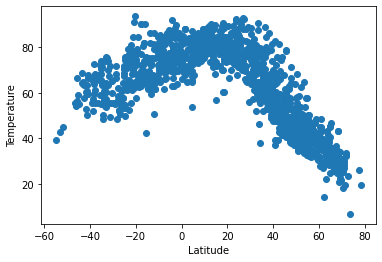

In [11]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Humidity Plot

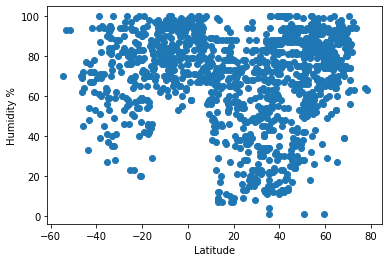

In [12]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Cloudiness Plot

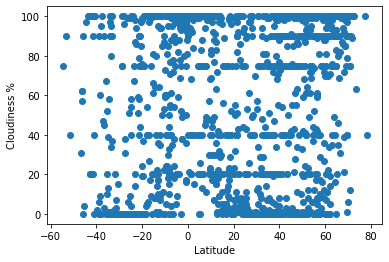

In [13]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness %'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Wind Speed Plot

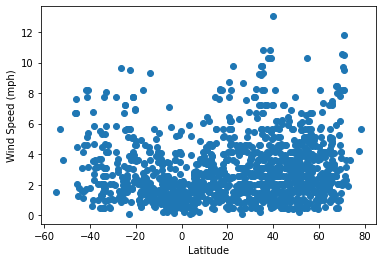

In [30]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1311
938
The r-squared is : 0.7845284496812982


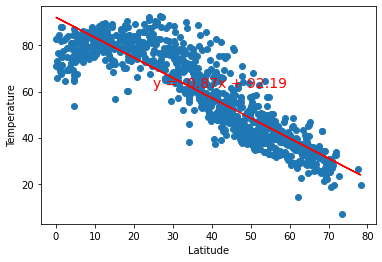

In [31]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Latitude')
print(len(weather_df))
print(len(subplot_df))
regression = linregress(subplot_df['Latitude'], subplot_df['Temperature'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Temperature']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (25,62), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.4029387915171908


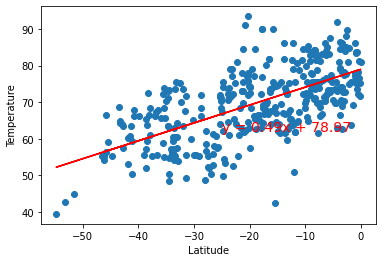

In [41]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Temperature'])
plt.ylabel('Temperature')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Temperature'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Temperature']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-25,62), fontsize=14, color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.01534233169468154


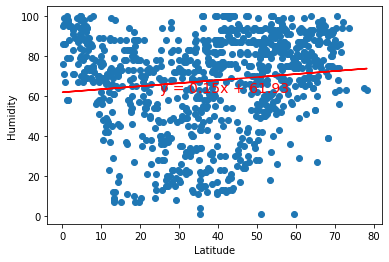

In [33]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Humidity'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Humidity']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (25,62), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09927410187367978


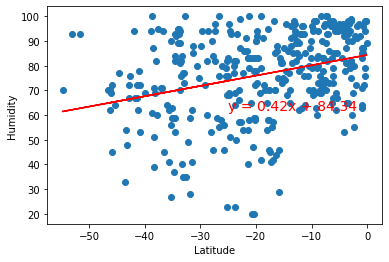

In [40]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Humidity'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Humidity']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-25,62), fontsize=14, color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.015445385382388719


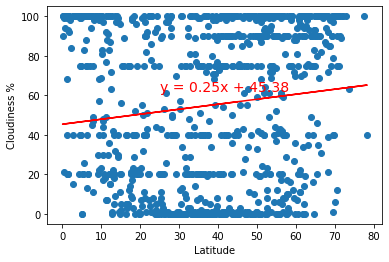

In [35]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Cloudiness %'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Cloudiness %'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Cloudiness %']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (25,62), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07623833364251055


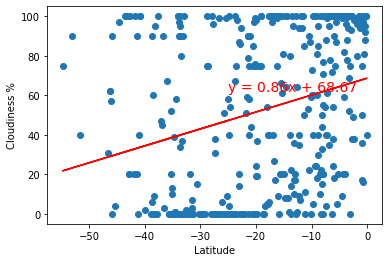

In [39]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Cloudiness %'])
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Cloudiness %'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Cloudiness %']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-25,62), fontsize=14, color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.03345673925633366


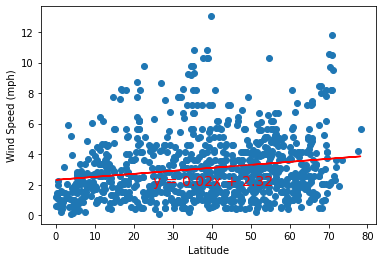

In [37]:
subplot_df = weather_df[weather_df['Latitude'] > 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Wind Speed (mph)']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (25,2), fontsize=14, color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.10061175074147903


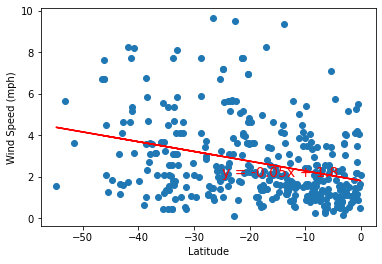

In [38]:
subplot_df = weather_df[weather_df['Latitude'] < 0 ]

plt.scatter(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

regression = linregress(subplot_df['Latitude'], subplot_df['Wind Speed (mph)'])
print(f'The r-squared is : {regression.rvalue * regression.rvalue}')
line = f'y = {round(regression.slope,2)}x + {round(regression.intercept,2)}'
x = subplot_df['Latitude']
y = subplot_df['Wind Speed (mph)']

plt.plot(x, regression.slope*x + regression.intercept, color='r')
plt.annotate(line, (-25,2), fontsize=14, color='red')
plt.show()